In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("merged.csv")
data.head(10)

,state,year,Geogra-phical Area-(Col.3),Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4),Forests-(Col.5),Not available for cultivation-Area under non-agri-cultural uses-(Col.6),Not available for cultivation-Barren & uncultur-able land-(Col.7),Not available for cultivation-Total (Col.6+Col.7)-(Col8),Other uncultivated land excluding-Fallow Land-Permanent pastures & other grazing lands-(Col.9),Other uncultivated land excluding-Fallow Land-Land under misc. tree crops & groves (not incl. in net area sown)-(Col.10),...,Fallow Lands-Current fallows-(Col.14),Fallow Lands-Total(Col.13+Col.14)-(Col.15),Net area Sown-(Col.16),Total Cropped Area-(Col.17),Area sown more than once (col.17-Col.16)-(Col.18),Agri. Land/Culti-vable land/Cultur-able land/Arable land (Col.10+Col.11+Col.12+Col.13)-(Col.19),Cultivated land (Col.14+Col.15)-(Col.20),Un-cultivable land (Col.4-Col.18)-(Col.21),Un-cultivated land (Col.4-Col.20)-(Col.22),production
0,Andhra Pradesh,2004,27507,27440,6199.0,2692,2084.0,4775,676.0,277.0,...,3036.0,4693.0,10118,12366,2248.0,15789,13154,11651,14286,1.214759e+09
1,Andhra Pradesh,2005,27507,27440,6199.0,2712,2084.0,4796,676.0,278.0,...,2819.0,4469.0,10327,12519,2191.0,15769,13146,11671,14294,9.107880e+08
2,Andhra Pradesh,2006,27507,27440,6199.0,2709,2084.0,4793,676.0,278.0,...,2434.0,4057.0,10745,13362,2617.0,15772,13179,11668,14261,1.346439e+09
3,Andhra Pradesh,2007,27507,27505,6210.0,2683,2098.0,4781,602.0,320.0,...,3166.0,4749.0,10147,12811,2664.0,15911,13313,11593,14191,3.200800e+07
4,Andhra Pradesh,2008,27507,27505,6210.0,2725,2059.0,4784,571.0,306.0,...,2719.0,4219.0,10756,13567,2811.0,15939,13475,11565,14030,9.921911e+08
5,Andhra Pradesh,2009,27507,27505,6210.0,2742,2056.0,4797,569.0,299.0,...,2624.0,4111.0,10868,13830,2962.0,15928,13492,11576,14013,1.166252e+09
6,Andhra Pradesh,2010,27507,27505,6210.0,2765,2043.0,4808,566.0,295.0,...,3361.0,4987.0,9991,12560,2569.0,15921,13352,11584,14152,2.873887e+07
7,Andhra Pradesh,2011,27507,27505,6230.0,2872,2026.0,4899,554.0,290.0,...,2229.0,3719.0,11186,14512,3326.0,15821,13415,11683,14089,1.452100e+09
8,Andhra Pradesh,2012,27507,27505,6230.0,2803,2024.0,4827,553.0,289.0,...,2273.0,3831.0,11161,13759,2599.0,15894,13434,11610,14071,1.701193e+09
9,Andhra Pradesh,2013,27507,27505,6227.0,2873,1959.0,4833,515.0,278.0,...,2337.0,3947.0,11117,13650,2533.0,15930,13454,11574,14050,1.645887e+09


In [3]:
data.fillna(0,inplace=True)

In [4]:
data.isnull().sum()

state                                                                                                                       0
year                                                                                                                        0
Geogra-phical Area-(Col.3)                                                                                                  0
Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4)                                                    0
Forests-(Col.5)                                                                                                             0
Not available for cultivation-Area under non-agri-cultural uses-(Col.6)                                                     0
Not available for cultivation-Barren & uncultur-able land-(Col.7)                                                           0
Not available for cultivation-Total (Col.6+Col.7)-(Col8)                                                              

In [5]:
# Dropping unnecessary columns

data = data.drop(['state','year'], axis = 1)

In [6]:
# FEATURE SELECTION
# Ensemble trees based feature selection.

X = data.iloc[:, :data.shape[1]-1]
y = data.iloc[:, data.shape[1]-1]

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

reg = ExtraTreesRegressor(n_estimators=50)
reg = reg.fit(X, y)
#print(reg.feature_importances_ )

model = SelectFromModel(reg, prefit=True)
X_new = model.transform(X)
X_new.shape

data_sel = data[data.columns.intersection(X.columns[model.get_support()])]
data_sel[data.columns[data.shape[1]-1]] = data.iloc[:, data.shape[1]-1]

# feature selected data
data_sel.head()

C:\Users\Kzoieh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Kzoieh\AppData\Local\Temp\ipykernel_21704\2891762928.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel[data.columns[data.shape[1]-1]] = data.iloc[:, data.shape[1]-1]


,Geogra-phical Area-(Col.3),Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4),Forests-(Col.5),Fallow Lands-Fallow lands other than current fallows-(Col.13),Net area Sown-(Col.16),Total Cropped Area-(Col.17),Area sown more than once (col.17-Col.16)-(Col.18),Agri. Land/Culti-vable land/Cultur-able land/Arable land (Col.10+Col.11+Col.12+Col.13)-(Col.19),Cultivated land (Col.14+Col.15)-(Col.20),Un-cultivated land (Col.4-Col.20)-(Col.22),production
0,27507,27440,6199.0,1658.0,10118,12366,2248.0,15789,13154,14286,1.214759e+09
1,27507,27440,6199.0,1651.0,10327,12519,2191.0,15769,13146,14294,9.107880e+08
2,27507,27440,6199.0,1623.0,10745,13362,2617.0,15772,13179,14261,1.346439e+09
3,27507,27505,6210.0,1583.0,10147,12811,2664.0,15911,13313,14191,3.200800e+07
4,27507,27505,6210.0,1500.0,10756,13567,2811.0,15939,13475,14030,9.921911e+08


In [7]:
data_sel.columns

Index(['Geogra-phical Area-(Col.3)',
       'Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4)',
       'Forests-(Col.5)',
       'Fallow Lands-Fallow lands other than current fallows-(Col.13)',
       'Net area Sown-(Col.16)', 'Total Cropped Area-(Col.17)',
       'Area sown more than once (col.17-Col.16)-(Col.18)',
       'Agri. Land/Culti-vable land/Cultur-able land/Arable land (Col.10+Col.11+Col.12+Col.13)-(Col.19)',
       'Cultivated land (Col.14+Col.15)-(Col.20)',
       'Un-cultivated land (Col.4-Col.20)-(Col.22)', 'production'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_norm = ['Geogra-phical Area-(Col.3)',
       'Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4)',
       'Net area Sown-(Col.16)', 'Total Cropped Area-(Col.17)',
       'Agri. Land/Culti-vable land/Cultur-able land/Arable land (Col.10+Col.11+Col.12+Col.13)-(Col.19)',
       'Cultivated land (Col.14+Col.15)-(Col.20)',
       'Un-cultivated land (Col.4-Col.20)-(Col.22)', 'production']
data_sel[cols_to_norm] = scaler.fit_transform(data_sel[cols_to_norm])

C:\Users\Kzoieh\AppData\Local\Temp\ipykernel_21704\3153807475.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel[cols_to_norm] = scaler.fit_transform(data_sel[cols_to_norm])


In [9]:
data_sel.head(10)

,Geogra-phical Area-(Col.3),Reporting area for land utilisationstatistics (col.4+7+11+14+15)-(Col.4),Forests-(Col.5),Fallow Lands-Fallow lands other than current fallows-(Col.13),Net area Sown-(Col.16),Total Cropped Area-(Col.17),Area sown more than once (col.17-Col.16)-(Col.18),Agri. Land/Culti-vable land/Cultur-able land/Arable land (Col.10+Col.11+Col.12+Col.13)-(Col.19),Cultivated land (Col.14+Col.15)-(Col.20),Un-cultivated land (Col.4-Col.20)-(Col.22),production
0,1.669046,1.669724,6199.0,1658.0,0.939172,0.740388,2248.0,1.329924,1.277064,2.015640,0.784479
1,1.669046,1.669724,6199.0,1651.0,0.976155,0.760125,2191.0,1.327142,1.275761,2.017389,0.522666
2,1.669046,1.669724,6199.0,1623.0,1.050120,0.868875,2617.0,1.327560,1.281135,2.010172,0.897895
3,1.669046,1.676086,6210.0,1583.0,0.944304,0.797794,2664.0,1.346892,1.302957,1.994863,-0.234233
4,1.669046,1.676086,6210.0,1500.0,1.052066,0.895321,2811.0,1.350786,1.329338,1.959653,0.592779
5,1.669046,1.676086,6210.0,1488.0,1.071885,0.929249,2962.0,1.349256,1.332107,1.955935,0.742699
6,1.669046,1.676086,6210.0,1627.0,0.916700,0.765414,2569.0,1.348283,1.309308,1.986334,-0.237049
7,1.669046,1.676086,6230.0,1490.0,1.128154,1.017230,3326.0,1.334375,1.319567,1.972556,0.988902
8,1.669046,1.676086,6230.0,1558.0,1.123731,0.920090,2599.0,1.344528,1.322661,1.968620,1.203447
9,1.669046,1.676086,6227.0,1610.0,1.115945,0.906029,2533.0,1.349535,1.325918,1.964027,1.155812


In [10]:
data_sel['Net area Sown-(Col.16)'].describe()

count    3.190000e+02
mean     1.113703e-17
std      1.001571e+00
min     -8.510245e-01
25%     -8.060794e-01
50%     -3.541506e-01
75%      1.576755e-01
max      2.395643e+00
Name: Net area Sown-(Col.16), dtype: float64

In [11]:
iqr =  1.576755e-01 - (-8.060794e-01)
upper =  1.576755e-01  + 1.5*iqr

print(upper)

1.60330785


In [12]:
for i in range (0,319):
  if data['Net area Sown-(Col.16)'][i]> 1.60330785:
    data['Net area Sown-(Col.16)'][i] = 1.60330785

C:\Users\Kzoieh\AppData\Local\Temp\ipykernel_21704\906268623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Net area Sown-(Col.16)'][i] = 1.60330785


In [13]:
data_sel['Cultivated land (Col.14+Col.15)-(Col.20)'].describe()

count    3.190000e+02
mean     2.227407e-17
std      1.001571e+00
min     -8.648813e-01
25%     -8.227035e-01
50%     -3.931094e-01
75%      1.484430e-01
max      2.338347e+00
Name: Cultivated land (Col.14+Col.15)-(Col.20), dtype: float64

In [14]:
iqr = 1.484430e-01 - (-8.227035e-01)
upper = 1.484430e-01 + 1.5*iqr

print(upper)

1.6051627499999999


In [15]:
for i in range (0,319):
  if data['Cultivated land (Col.14+Col.15)-(Col.20)'][i]> 1.6051627499999999:
    data['Cultivated land (Col.14+Col.15)-(Col.20)'][i] = 1.6051627499999999

C:\Users\Kzoieh\AppData\Local\Temp\ipykernel_21704\3628452704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cultivated land (Col.14+Col.15)-(Col.20)'][i] = 1.6051627499999999


In [16]:
from sklearn.model_selection import train_test_split

x = data_sel.drop(["production"], axis=1)
y = data_sel["production"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=5)

In [17]:
# Training the Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
# Predicting the test Results 

lr_predict = model.predict(x_test)

In [19]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lr_predict)

rmse = math.sqrt(mse)
print(rmse)

0.6087513333257478


In [20]:
#Calculating R2 score
from sklearn.metrics import r2_score
r0 = r2_score(y_test,lr_predict)
print("R2 score : ",r0)

R2 score :  -0.16293126257999502


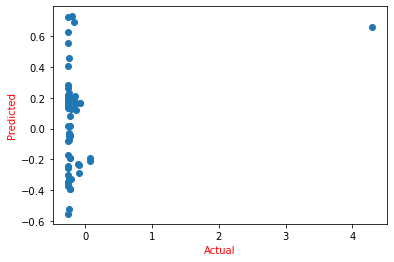

In [21]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual',color='Red')
plt.ylabel('Predicted',color='Red')
#plt.label.set_color('White')
#plt.yaxis.label.set_color('White')
plt.show()

In [22]:
#Training the KNN regression model

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10 , weights='distance')
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [24]:
#Predicting test results

knn_pred = knn.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, knn_pred)

rmse = math.sqrt(mse)
print(rmse)

0.15605227280004094


In [26]:
#Calculating R2 score
from sklearn.metrics import r2_score
r = r2_score(y_test,knn_pred)
print("R2 score : ",r)

R2 score :  0.9235787052636032


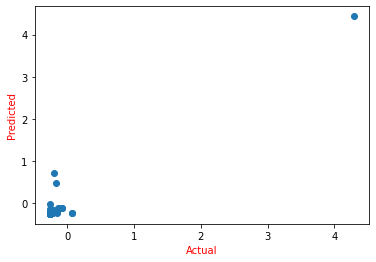

In [27]:
plt.scatter(y_test,knn_pred)
plt.xlabel('Actual',color='Red')
plt.ylabel('Predicted',color='Red')
plt.show()

In [28]:
#Training the Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=11)

In [29]:
#Predicting the test results

rf_predict = model.predict(x_test)

In [30]:
mse = mean_squared_error(y_test, rf_predict)

rmse = math.sqrt(mse)
print(rmse)

0.07703381671321552


In [31]:
#Calculating R2 score
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9813775410083793


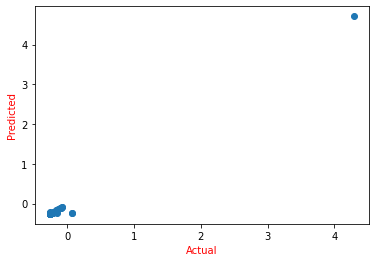

In [32]:
plt.scatter(y_test,rf_predict)
plt.xlabel('Actual',color='Red')
plt.ylabel('Predicted',color='Red')
plt.show()